In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/healthcare-dataset/healthcare_dataset.csv


***Introduction***

This is a beginner project to practice basic data cleaning, manipulation, analysis and visualization. I have documented my analysis step by step.

The objectives of this project are bolded and written in markdown cells for readability.

Comments in the project are used for explanation and better understanding. 

Tools used in this project:
- Python (Pandas, Matplotlib, Seaborn for data manipulation and visualization.
- Kaggle notebooks, essentially Jupyter notebooks, for interactive development and documentation.

**Data Inspection**

Display basic information about the dataset, such as:

- The first few rows
- Data Types
- Summary Statisics

In [3]:
# Import dataset and Look at the first 10 rows

hd = pd.read_csv("/kaggle/input/healthcare-dataset/healthcare_dataset.csv")
hd.head(10)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal
5,Patrick Parker,41,Male,AB+,Arthritis,2020-08-20,Robin Green,Boyd PLC,Aetna,22522.363385,180,Urgent,2020-08-23,Aspirin,Abnormal
6,Charles Horton,82,Male,AB+,Hypertension,2021-03-22,Patricia Bishop,"Wheeler, Bryant and Johns",Cigna,39593.435761,161,Urgent,2021-04-15,Lipitor,Abnormal
7,Patty Norman,55,Female,O-,Arthritis,2019-05-16,Brian Kennedy,Brown Inc,Blue Cross,13546.817249,384,Elective,2019-06-02,Aspirin,Normal
8,Ryan Hayes,33,Male,A+,Diabetes,2020-12-17,Kristin Dunn,"Smith, Edwards and Obrien",Aetna,24903.037270,215,Elective,2020-12-22,Aspirin,Abnormal
9,Sharon Perez,39,Female,O-,Asthma,2022-12-15,Jessica Bailey,Brown-Golden,Blue Cross,22788.236026,310,Urgent,2022-12-16,Aspirin,Normal


In [4]:
# Inspect data : Non-null count, datatype for any of each column in the dataset, etc

hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [5]:
# Get summary stats on numeric values of the dataset

hd.describe()

,Age,Billing Amount,Room Number
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,300.082000
std,19.588974,14067.292709,115.806027
min,18.000000,1000.180837,101.000000
25%,35.000000,13506.523967,199.000000
50%,52.000000,25258.112566,299.000000
75%,68.000000,37733.913727,400.000000
max,85.000000,49995.902283,500.000000


**Data Cleaning**

- Check for any missing values and return a count of null values
- Rename columns with spaces
- Create new column named Stay_Length
- Remove any outliers

In [6]:
# Check for null values in the entire dataframe, and return a null count for each column.

null_values = hd.isnull().sum()


print("Null Count in HealthCare dataframe :")
print(null_values) # There are no null (NaN) values in this dataset

Null Count in HealthCare dataframe :
Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


In [8]:
# Rename column names with spaces, for easier data manipulation/visualization

hdr = hd.rename(columns={'Blood Type':'Blood_Type', 'Medical Condition':'Medical_Condition','Date of Admission':'Admission_Date',
                        'Insurance Provider':'Insurance_Provider', 'Billing Amount':'Billing_Amount', 'Room Number':'Room_Number',
                        'Admission Type':'Admission_Type', 'Discharge Date':'Discharge_Date', 'Test Results':'Test_Results'})
hdr.head(10)

,Name,Age,Gender,Blood_Type,Medical_Condition,Admission_Date,Doctor,Hospital,Insurance_Provider,Billing_Amount,Room_Number,Admission_Type,Discharge_Date,Medication,Test_Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal
5,Patrick Parker,41,Male,AB+,Arthritis,2020-08-20,Robin Green,Boyd PLC,Aetna,22522.363385,180,Urgent,2020-08-23,Aspirin,Abnormal
6,Charles Horton,82,Male,AB+,Hypertension,2021-03-22,Patricia Bishop,"Wheeler, Bryant and Johns",Cigna,39593.435761,161,Urgent,2021-04-15,Lipitor,Abnormal
7,Patty Norman,55,Female,O-,Arthritis,2019-05-16,Brian Kennedy,Brown Inc,Blue Cross,13546.817249,384,Elective,2019-06-02,Aspirin,Normal
8,Ryan Hayes,33,Male,A+,Diabetes,2020-12-17,Kristin Dunn,"Smith, Edwards and Obrien",Aetna,24903.037270,215,Elective,2020-12-22,Aspirin,Abnormal
9,Sharon Perez,39,Female,O-,Asthma,2022-12-15,Jessica Bailey,Brown-Golden,Blue Cross,22788.236026,310,Urgent,2022-12-16,Aspirin,Normal


In [9]:
# Convert datatype for Admission Date and Discharge date to datetime format

hdr['Admission_Date'] = pd.to_datetime(hdr['Admission_Date'])
hdr['Discharge_Date'] = pd.to_datetime(hdr['Discharge_Date'])

hdr.Admission_Date.dtype # check datatype change
# Now Admission and Discharge Date columns are ready to be used to create Stay_Length column.


dtype('<M8[ns]')

In [11]:
# Calculate Length of Stay and add that column to the dataframe as Stay_Length

hdr['Stay_Length'] = hdr['Discharge_Date'] - hdr['Admission_Date']
hdr.head(10)

,Name,Age,Gender,Blood_Type,Medical_Condition,Admission_Date,Doctor,Hospital,Insurance_Provider,Billing_Amount,Room_Number,Admission_Type,Discharge_Date,Medication,Test_Results,Stay_Length
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive,14 days
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal,14 days
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal,30 days
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal,1 days
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal,24 days
5,Patrick Parker,41,Male,AB+,Arthritis,2020-08-20,Robin Green,Boyd PLC,Aetna,22522.363385,180,Urgent,2020-08-23,Aspirin,Abnormal,3 days
6,Charles Horton,82,Male,AB+,Hypertension,2021-03-22,Patricia Bishop,"Wheeler, Bryant and Johns",Cigna,39593.435761,161,Urgent,2021-04-15,Lipitor,Abnormal,24 days
7,Patty Norman,55,Female,O-,Arthritis,2019-05-16,Brian Kennedy,Brown Inc,Blue Cross,13546.817249,384,Elective,2019-06-02,Aspirin,Normal,17 days
8,Ryan Hayes,33,Male,A+,Diabetes,2020-12-17,Kristin Dunn,"Smith, Edwards and Obrien",Aetna,24903.037270,215,Elective,2020-12-22,Aspirin,Abnormal,5 days
9,Sharon Perez,39,Female,O-,Asthma,2022-12-15,Jessica Bailey,Brown-Golden,Blue Cross,22788.236026,310,Urgent,2022-12-16,Aspirin,Normal,1 days


In [14]:
# Remove an outliers or inconsistancies from the Billing Amount column

hdr_condensed = hdr[hdr['Billing_Amount'] < hdr['Billing_Amount'].quantile(0.95)]
hdr_condensed.info()

# Now the dataframe only 9500 records instead of the 100000, removes the outliers.


<class 'pandas.core.frame.DataFrame'>
Index: 9500 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Name                9500 non-null   object         
 1   Age                 9500 non-null   int64          
 2   Gender              9500 non-null   object         
 3   Blood_Type          9500 non-null   object         
 4   Medical_Condition   9500 non-null   object         
 5   Admission_Date      9500 non-null   datetime64[ns] 
 6   Doctor              9500 non-null   object         
 7   Hospital            9500 non-null   object         
 8   Insurance_Provider  9500 non-null   object         
 9   Billing_Amount      9500 non-null   float64        
 10  Room_Number         9500 non-null   int64          
 11  Admission_Type      9500 non-null   object         
 12  Discharge_Date      9500 non-null   datetime64[ns] 
 13  Medication          9500 non-null   ob

***Create Visualizations using Matplotlib or Seaborn***

Explore Distribution of:
- Patient Ages
- Billing Amounts
- Gender Distribution
- Medical Conditions
- Blood Type 
- Test Results
- Medications Administered
- Insurance Provider
- Admission Type

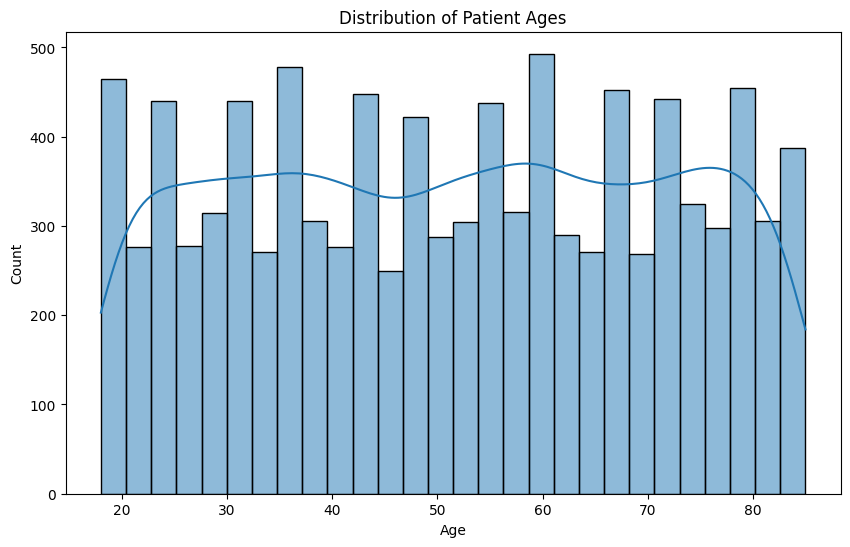

In [15]:
# Plot Distribution of Patients Age

plt.figure(figsize=(10,6))
sns.histplot(hdr['Age'], bins=28, kde=True)
plt.title('Distribution of Patient Ages')
plt.xlabel('Age')
plt.show()


In [16]:
# Deeper look into the Patient's ages

hdr.Age.value_counts() # Age with the highest count was 59.
hdr.Age.describe() # Average age is 51, rounded to nearest whole number.

count    10000.000000
mean        51.452200
std         19.588974
min         18.000000
25%         35.000000
50%         52.000000
75%         68.000000
max         85.000000
Name: Age, dtype: float64

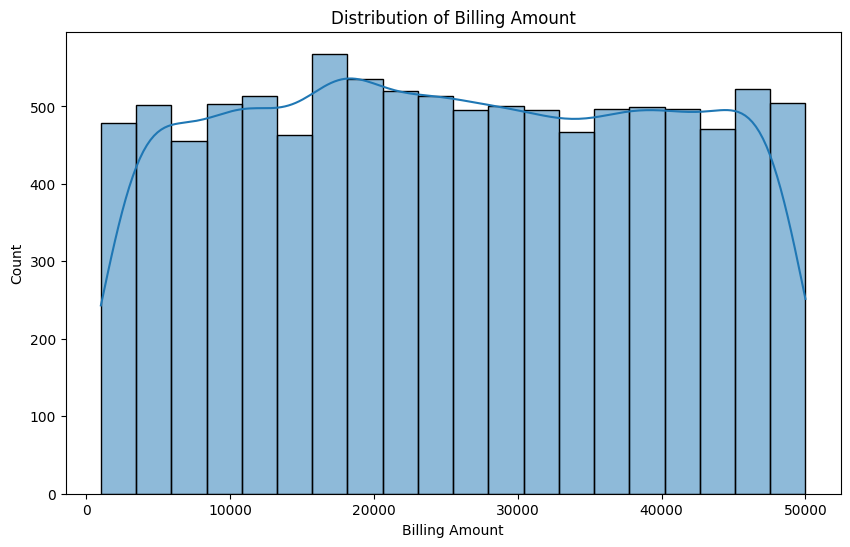

In [17]:
# Plot Distribution of Billing Amount

plt.figure(figsize=(10,6))
sns.histplot(hdr['Billing_Amount'], bins=20, kde=True)
plt.title('Distribution of Billing Amount')
plt.xlabel('Billing Amount')
plt.show()

In [18]:
# Deeper look into Billing Amounts
hdr.Billing_Amount.describe() # Average Billing Amount = $25,516.80 rounded to nearest cent.
hdr.Billing_Amount.value_counts() # No billing amount is the same, all amounts have 1 count(appearance)

Billing_Amount
37490.983364    1
33332.570385    1
19166.455615    1
26645.338403    1
45729.371668    1
               ..
37737.131216    1
39381.222526    1
47682.625945    1
31911.055695    1
37223.965865    1
Name: count, Length: 10000, dtype: int64

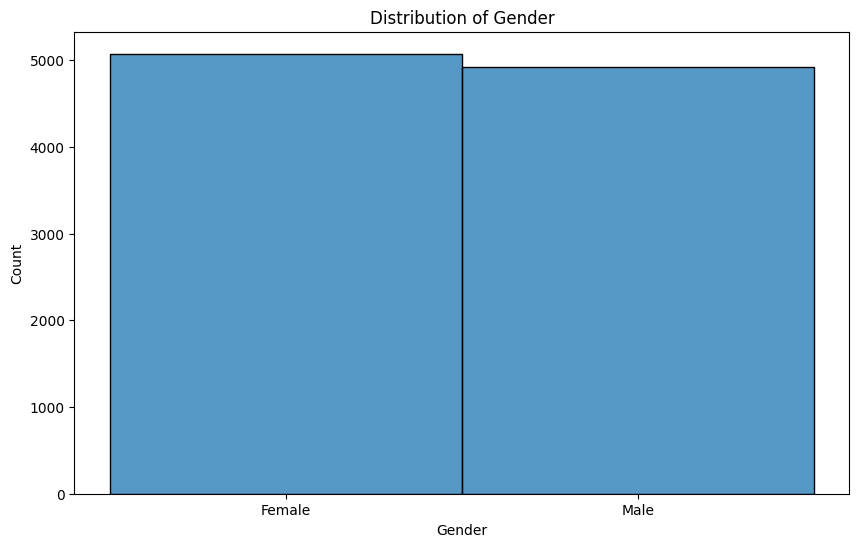

In [19]:
# Plot Distribution of Gender

plt.figure(figsize=(10,6))
sns.histplot(hdr['Gender'], bins=2, kde=False)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.show()

In [20]:
# Deeper look into Patient's Gender
hdr.Gender.describe()

count      10000
unique         2
top       Female
freq        5075
Name: Gender, dtype: object

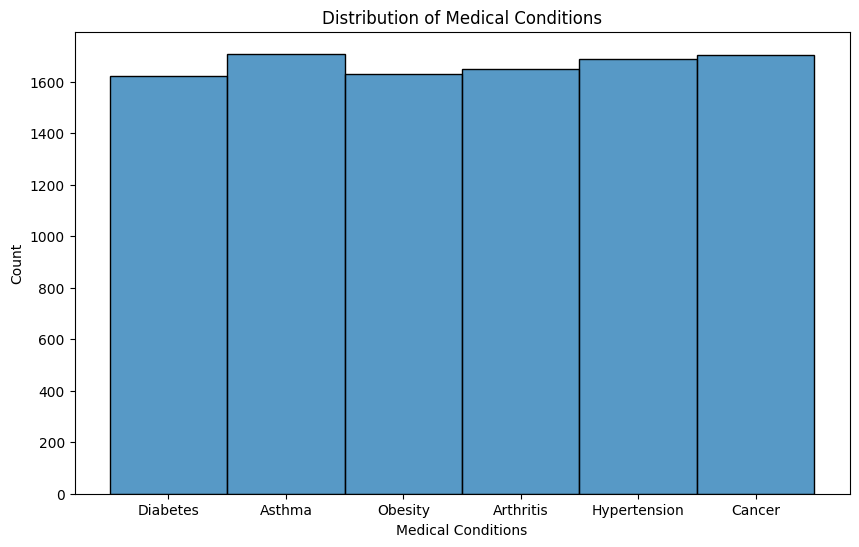

In [21]:
# Plot Distribution of Medical Conditions

plt.figure(figsize=(10,6))
sns.histplot(hdr['Medical_Condition'], bins=28, kde=False)
plt.title('Distribution of Medical Conditions')
plt.xlabel('Medical Conditions')
plt.show()

In [22]:
# Deeper look into Medical Conditions
hdr.Medical_Condition.describe()
hdr.Medical_Condition.value_counts()

Medical_Condition
Asthma          1708
Cancer          1703
Hypertension    1688
Arthritis       1650
Obesity         1628
Diabetes        1623
Name: count, dtype: int64

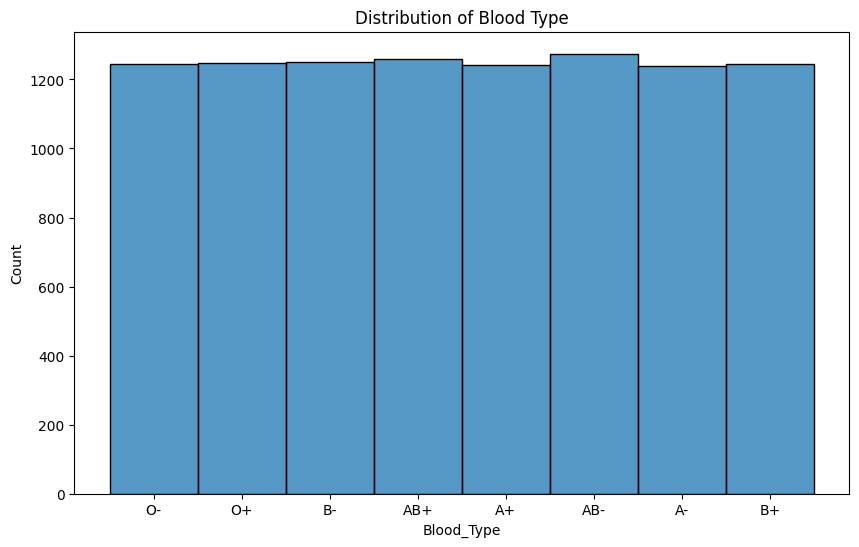

In [23]:
# Plot Distribution of Blood Type 

plt.figure(figsize=(10,6))
sns.histplot(hdr['Blood_Type'], bins=8, kde=False)
plt.title('Distribution of Blood Type')
plt.xlabel('Blood_Type')
plt.show()

In [24]:
# Deeper look into Blood Types
hdr.Blood_Type.describe()
hdr.Blood_Type.value_counts()

Blood_Type
AB-    1275
AB+    1258
B-     1252
O+     1248
O-     1244
B+     1244
A+     1241
A-     1238
Name: count, dtype: int64

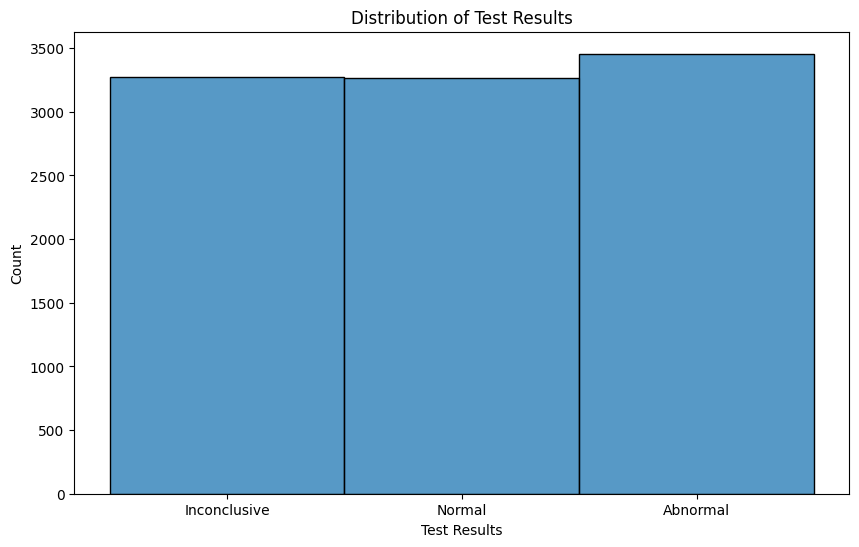

In [25]:
# Plot Distribution of Test Results

plt.figure(figsize=(10,6))
sns.histplot(hdr['Test_Results'], bins=3, kde=False)
plt.title('Distribution of Test Results')
plt.xlabel('Test Results')
plt.show()

In [26]:
# Deeper look into Test Results
hdr.Test_Results.describe()
hdr.Test_Results.value_counts()

Test_Results
Abnormal        3456
Inconclusive    3277
Normal          3267
Name: count, dtype: int64

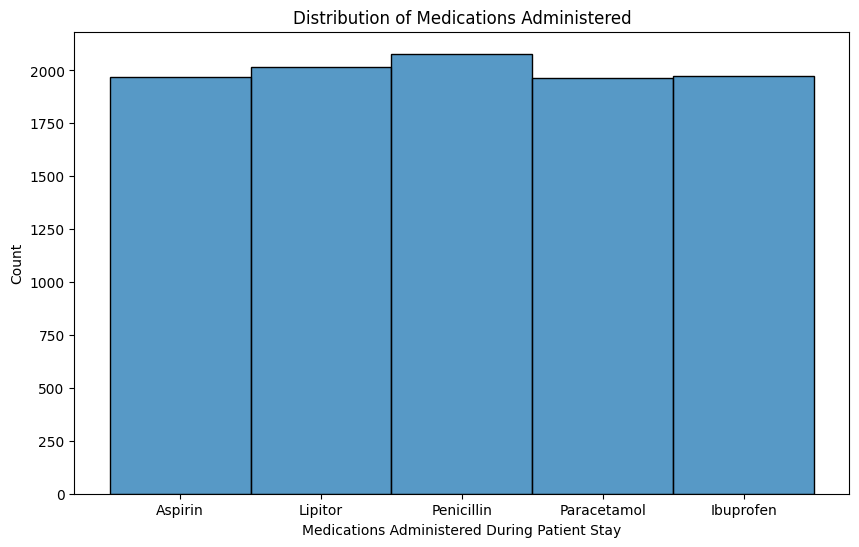

In [27]:
# Plot Distribution of Medication Administered

plt.figure(figsize=(10,6))
sns.histplot(hdr['Medication'], bins=5, kde=False)
plt.title('Distribution of Medications Administered')
plt.xlabel('Medications Administered During Patient Stay')
plt.show()

In [28]:
# Deeper look into Medications Administered
hdr.Medication.describe()
hdr.Medication.value_counts()

Medication
Penicillin     2079
Lipitor        2015
Ibuprofen      1976
Aspirin        1968
Paracetamol    1962
Name: count, dtype: int64

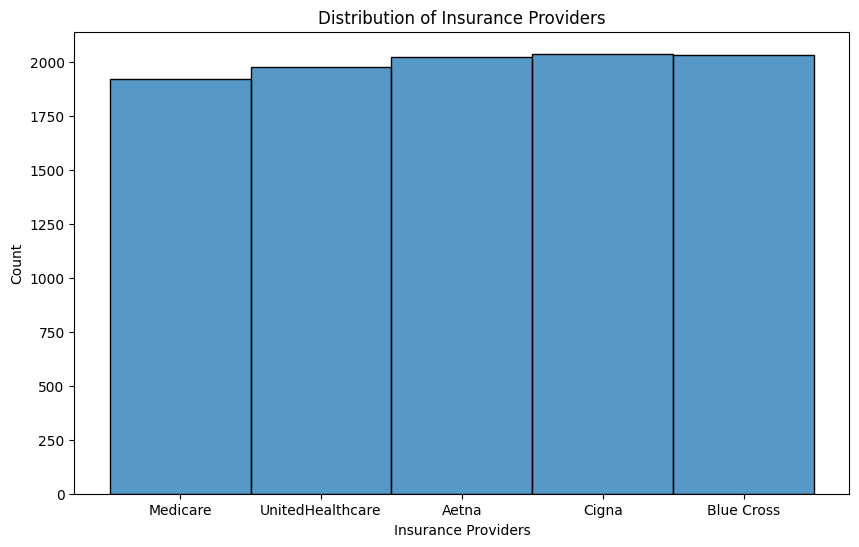

In [29]:
# Plot Distribution of Insurance Providers 

plt.figure(figsize=(10,6))
sns.histplot(hdr['Insurance_Provider'], bins=5, kde=False)
plt.title('Distribution of Insurance Providers')
plt.xlabel('Insurance Providers')
plt.show()

In [30]:
# Deeper look into Insurance Providers 

hdr.Insurance_Provider.describe()
hdr.Insurance_Provider.value_counts()

Insurance_Provider
Cigna               2040
Blue Cross          2032
Aetna               2025
UnitedHealthcare    1978
Medicare            1925
Name: count, dtype: int64

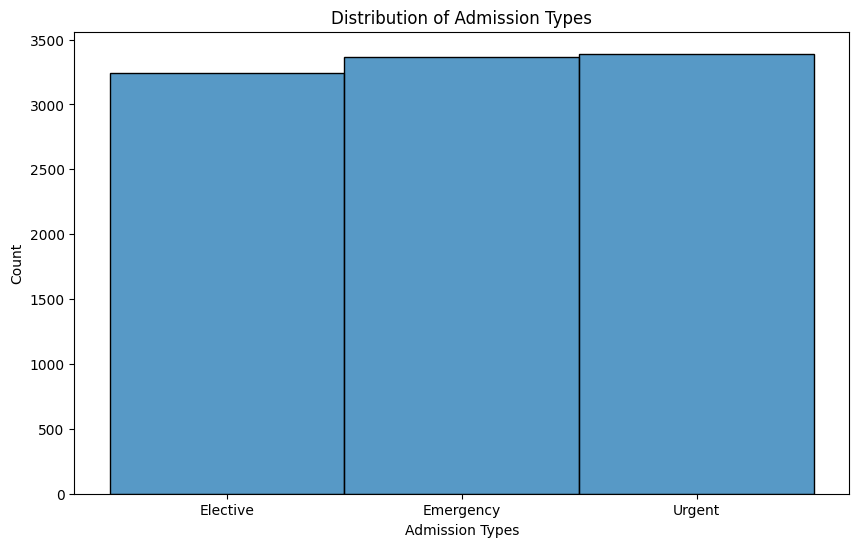

In [31]:
# Plot Distribution of Admission Type 

plt.figure(figsize=(10,6))
sns.histplot(hdr['Admission_Type'], bins=3, kde=False)
plt.title('Distribution of Admission Types')
plt.xlabel('Admission Types')
plt.show()

In [32]:
# Deeper look into Admission Types
hdr.Admission_Type.describe()
hdr.Admission_Type.value_counts()

Admission_Type
Urgent       3391
Emergency    3367
Elective     3242
Name: count, dtype: int64

***Correlation Analysis***

Explore correlations between numerical varibables. Visualize correlation using a heatmap.


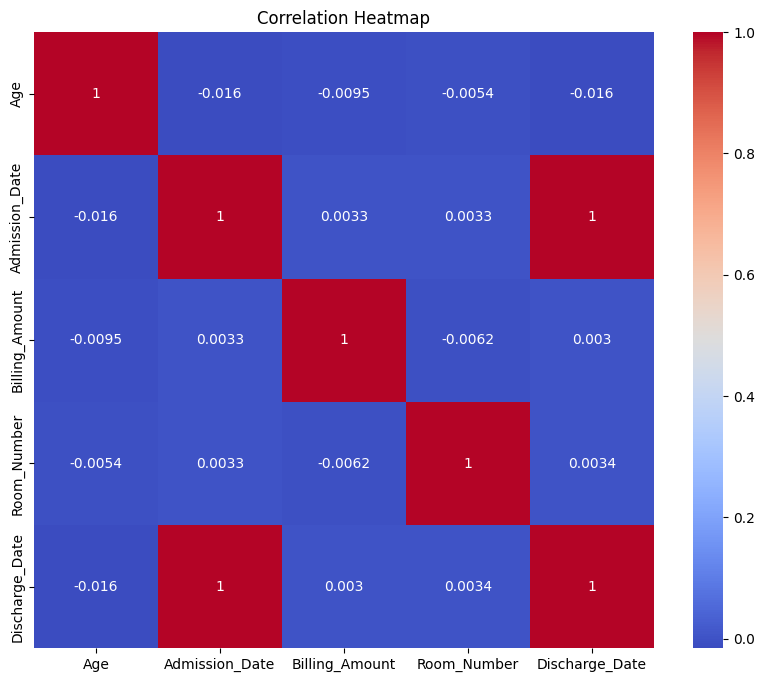

In [33]:
numeric_columns = hdr.select_dtypes(include=['Float64','int64','<M8[ns]'])

correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

***Summary and insights drawn from data analysis***
- Dataset was not missing any values, columns renamed for easier anaylsis.
- Data was pretty evenly distributed (as shown in visualization). 
- Slightly more female patients then male patients but not significant.
- Most common: 
    - Test result = "Abnormal"
    - Medical Condition = "Asthma"
    - Medication administered = "Penicillin"
    - Age = 59 (Average age was 51 rounded to nearest whole number)
    - Blood Type = AB-
    - Insurance Provider = "Cigna" 
    - Admission Type = "Urgent"
- Average Billing Amount = $25,516.80 (rounded to nearest cent.)
- There is low correlation between numeric values, signifying no notable relationships between age, room number, billing amount, admission and discharge date. 


I have gained hands-on experience with data cleaning, manipulation, visualization, and basic analysis using Python.